In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [4]:
filename = "../Data/rssi5.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [5]:
data[scanners] = minMaxScaling(data[scanners])

In [6]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,3219.000000,3140.000000,2388.000000,3396.000000,3168.000000,3347.000000,3461.000000,3819.000000,4928.000000,2340.000000,3180.000000,3074.000000,3378.000000,3859.000000,3303.000000,2179.000000,3539.000000
mean,0.438490,0.402463,0.354355,0.426232,0.437463,0.425197,0.421501,0.427935,0.419207,0.368105,0.387825,0.468933,0.499724,0.372234,0.420169,0.296665,0.402562
std,0.151902,0.130322,0.120450,0.142455,0.114273,0.156658,0.155481,0.146579,0.196955,0.179789,0.184707,0.130727,0.130346,0.153890,0.143028,0.135034,0.135141
min,0.050000,0.033333,0.050000,0.033333,0.050000,0.033333,0.050000,0.050000,0.033333,0.033333,0.033333,0.066667,0.066667,0.033333,0.033333,0.033333,0.033333
25%,0.333333,0.300000,0.266667,0.329167,0.366667,0.300000,0.283333,0.300000,0.283333,0.216667,0.216667,0.383333,0.416667,0.216667,0.316667,0.183333,0.300000
50%,0.466667,0.416667,0.350000,0.416667,0.450000,0.450000,0.416667,0.450000,0.416667,0.333333,0.400000,0.466667,0.500000,0.416667,0.416667,0.283333,0.416667
75%,0.533333,0.516667,0.450000,0.550000,0.533333,0.550000,0.550000,0.550000,0.516667,0.533333,0.550000,0.550000,0.600000,0.516667,0.516667,0.416667,0.516667
max,0.733333,0.616667,0.600000,0.700000,0.683333,0.750000,0.783333,0.650000,0.850000,0.700000,0.800000,0.750000,0.766667,0.633333,0.733333,0.566667,0.666667


## Train Validation Test Split

In [7]:
train, validation, test = train_validation_test_split(data)

In [8]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_10,204,101,81,194,172,80,73,258,0,166,89,119,194,300,146,4,218
V1_11,49,64,74,92,117,81,60,87,110,43,55,135,123,27,38,24,78
V1_12,68,79,56,91,82,85,52,55,161,48,64,155,120,81,103,53,71
V1_13,70,139,56,108,43,88,97,109,258,10,43,118,85,84,148,12,59
V1_14,29,146,38,79,57,91,248,65,203,16,113,44,82,95,161,70,88
V1_18,53,22,49,82,40,31,28,222,2,63,35,54,55,210,23,0,157
V1_19,291,88,81,152,246,75,59,289,36,131,46,138,245,272,102,92,208
V1_20,112,110,92,73,121,83,66,80,80,32,68,86,160,15,88,23,66
V1_21,66,143,70,71,98,87,132,53,149,21,96,97,85,61,82,67,63


In [9]:
train.shape

(29797, 19)

In [10]:
validation.shape

(9933, 19)

In [11]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [12]:
train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

In [13]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30177,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.566667,NaN,NaN,NaN,NaN
4,V1_10,30179,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,0.316667,0.183333,NaN,0.566667,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29792,V1_9,43166,0.433333,NaN,0.366667,0.616667,0.483333,NaN,NaN,0.625,NaN,0.183333,NaN,0.550000,0.350000,0.475,NaN,NaN,NaN
29793,V1_9,43167,0.383333,NaN,0.366667,0.616667,0.483333,NaN,NaN,0.625,NaN,0.183333,NaN,0.550000,0.350000,0.475,NaN,0.1,NaN
29794,V1_9,43168,0.383333,NaN,0.366667,0.616667,NaN,NaN,NaN,0.625,NaN,0.183333,NaN,0.550000,0.400000,0.475,NaN,0.1,NaN
29795,V1_9,43169,0.383333,NaN,0.366667,0.616667,NaN,NaN,NaN,0.625,NaN,0.183333,NaN,0.550000,0.400000,0.475,NaN,0.1,NaN


## Imputation
1. Forward fill
2. Fill NaN

In [14]:
train_imputed = train_rolled.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

In [15]:
validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

In [16]:
test_imputed = test_rolled.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

## Change Location to Coordinates

In [17]:
train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

In [18]:
validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

In [19]:
test_imputed["X"] = test_imputed["location"].apply(lambda x: pin[x]["X"])
test_imputed["Y"] = test_imputed["location"].apply(lambda x: pin[x]["Y"])

## Model Training

In [20]:
X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

In [21]:
model = MLPRegressor(size='normal')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, X_validation, y_validation)

Train on 29797 samples, validate on 9933 samples
Epoch 1/1000
29797/29797 [==============================] - 2s 51us/sample - loss: 21.0006 - mae: 2.1671 - mse: 14.0226 - val_loss: 11.2401 - val_mae: 1.6503 - val_mse: 4.6492
Epoch 2/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 9.6927 - mae: 1.0894 - mse: 2.0353 - val_loss: 9.8380 - val_mae: 1.0862 - val_mse: 2.1692
Epoch 3/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 9.3608 - mae: 0.9766 - mse: 1.6784 - val_loss: 9.6860 - val_mae: 0.9620 - val_mse: 1.7651
Epoch 4/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 9.1625 - mae: 0.9032 - mse: 1.4678 - val_loss: 9.6656 - val_mae: 1.1137 - val_mse: 2.1067
Epoch 5/1000
29797/29797 [==============================] - 1s 38us/sample - loss: 9.0240 - mae: 0.8543 - mse: 1.3229 - val_loss: 9.4468 - val_mae: 0.9360 - val_mse: 1.5968
Epoch 6/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 

Epoch 48/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.2355 - mae: 0.5741 - mse: 0.5937 - val_loss: 8.6998 - val_mae: 0.6318 - val_mse: 0.9333
Epoch 49/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.2317 - mae: 0.5725 - mse: 0.5898 - val_loss: 8.8265 - val_mae: 0.9998 - val_mse: 1.5950
Epoch 50/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.2270 - mae: 0.5713 - mse: 0.5854 - val_loss: 8.7960 - val_mae: 0.9716 - val_mse: 1.6358
Epoch 51/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.2251 - mae: 0.5705 - mse: 0.5843 - val_loss: 9.2429 - val_mae: 0.5649 - val_mse: 0.8047
Epoch 52/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.2212 - mae: 0.5686 - mse: 0.5794 - val_loss: 8.7841 - val_mae: 0.5290 - val_mse: 0.7329
Epoch 53/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.2174 - mae: 0.5670 - mse: 0.5771 - val_loss:

29797/29797 [==============================] - 1s 31us/sample - loss: 8.1264 - mae: 0.5368 - mse: 0.4972 - val_loss: 8.5940 - val_mae: 0.7950 - val_mse: 1.2187
Epoch 96/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.1248 - mae: 0.5361 - mse: 0.4963 - val_loss: 8.5436 - val_mae: 0.6890 - val_mse: 0.9692
Epoch 97/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.1224 - mae: 0.5353 - mse: 0.4931 - val_loss: 8.5870 - val_mae: 0.5355 - val_mse: 0.7382
Epoch 98/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.1221 - mae: 0.5348 - mse: 0.4936 - val_loss: 8.5876 - val_mae: 0.6935 - val_mse: 1.0891
Epoch 99/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.1195 - mae: 0.5346 - mse: 0.4911 - val_loss: 8.6227 - val_mae: 0.5442 - val_mse: 0.7614
Epoch 100/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.1188 - mae: 0.5336 - mse: 0.4901 - val_loss: 8.6285 - val

Epoch 142/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 8.0773 - mae: 0.5191 - mse: 0.4539 - val_loss: 8.6035 - val_mae: 0.5095 - val_mse: 0.7116
Epoch 143/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0757 - mae: 0.5181 - mse: 0.4517 - val_loss: 8.6362 - val_mae: 0.4935 - val_mse: 0.6947
Epoch 144/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0759 - mae: 0.5185 - mse: 0.4530 - val_loss: 8.7864 - val_mae: 0.4789 - val_mse: 0.6732
Epoch 145/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0748 - mae: 0.5181 - mse: 0.4509 - val_loss: 8.5264 - val_mae: 0.5765 - val_mse: 0.8237
Epoch 146/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0748 - mae: 0.5181 - mse: 0.4512 - val_loss: 8.5325 - val_mae: 0.5549 - val_mse: 0.7794
Epoch 147/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0725 - mae: 0.5178 - mse: 0.4495 - val

Epoch 189/1000
29797/29797 [==============================] - 1s 37us/sample - loss: 8.0498 - mae: 0.5103 - mse: 0.4298 - val_loss: 8.5687 - val_mae: 0.5635 - val_mse: 0.8135
Epoch 190/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0501 - mae: 0.5102 - mse: 0.4297 - val_loss: 8.5660 - val_mae: 0.7305 - val_mse: 1.1672
Epoch 191/1000
29797/29797 [==============================] - 1s 33us/sample - loss: 8.0505 - mae: 0.5103 - mse: 0.4309 - val_loss: 8.5150 - val_mae: 0.5621 - val_mse: 0.7667
Epoch 192/1000
29797/29797 [==============================] - 1s 33us/sample - loss: 8.0480 - mae: 0.5097 - mse: 0.4278 - val_loss: 8.5521 - val_mae: 0.7691 - val_mse: 1.1955
Epoch 193/1000
29797/29797 [==============================] - 1s 35us/sample - loss: 8.0489 - mae: 0.5095 - mse: 0.4287 - val_loss: 8.5012 - val_mae: 0.5781 - val_mse: 0.8121
Epoch 194/1000
29797/29797 [==============================] - 1s 33us/sample - loss: 8.0479 - mae: 0.5095 - mse: 0.4276 - val

Epoch 236/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0321 - mae: 0.5049 - mse: 0.4143 - val_loss: 8.4776 - val_mae: 0.7026 - val_mse: 0.9971
Epoch 237/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0309 - mae: 0.5042 - mse: 0.4130 - val_loss: 8.5093 - val_mae: 0.5993 - val_mse: 0.8868
Epoch 238/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0315 - mae: 0.5042 - mse: 0.4138 - val_loss: 8.4846 - val_mae: 0.6589 - val_mse: 0.8920
Epoch 239/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0322 - mae: 0.5048 - mse: 0.4147 - val_loss: 8.6547 - val_mae: 0.4308 - val_mse: 0.6272
Epoch 240/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0300 - mae: 0.5037 - mse: 0.4118 - val_loss: 8.5137 - val_mae: 0.5928 - val_mse: 0.8446
Epoch 241/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0307 - mae: 0.5040 - mse: 0.4130 - val

Epoch 283/1000
29797/29797 [==============================] - 1s 33us/sample - loss: 8.0198 - mae: 0.5006 - mse: 0.4035 - val_loss: 8.4801 - val_mae: 0.7285 - val_mse: 1.0678
Epoch 284/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 8.0185 - mae: 0.5007 - mse: 0.4026 - val_loss: 8.4806 - val_mae: 0.6844 - val_mse: 0.9606
Epoch 285/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 8.0183 - mae: 0.5007 - mse: 0.4022 - val_loss: 8.4893 - val_mae: 0.5701 - val_mse: 0.8010
Epoch 286/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 8.0186 - mae: 0.5009 - mse: 0.4025 - val_loss: 8.4688 - val_mae: 0.6407 - val_mse: 0.9159
Epoch 287/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 8.0175 - mae: 0.5001 - mse: 0.4011 - val_loss: 8.4969 - val_mae: 0.5609 - val_mse: 0.7831
Epoch 288/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 8.0170 - mae: 0.5001 - mse: 0.4009 - val

Epoch 330/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0089 - mae: 0.4977 - mse: 0.3939 - val_loss: 8.4763 - val_mae: 0.5837 - val_mse: 0.7965
Epoch 331/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0090 - mae: 0.4980 - mse: 0.3943 - val_loss: 8.4681 - val_mae: 0.6524 - val_mse: 0.9688
Epoch 332/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0089 - mae: 0.4979 - mse: 0.3944 - val_loss: 8.5867 - val_mae: 0.5103 - val_mse: 0.6974
Epoch 333/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0083 - mae: 0.4976 - mse: 0.3938 - val_loss: 8.4581 - val_mae: 0.6595 - val_mse: 0.8824
Epoch 334/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0084 - mae: 0.4977 - mse: 0.3938 - val_loss: 8.5016 - val_mae: 0.5097 - val_mse: 0.7216
Epoch 335/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 8.0079 - mae: 0.4975 - mse: 0.3932 - val

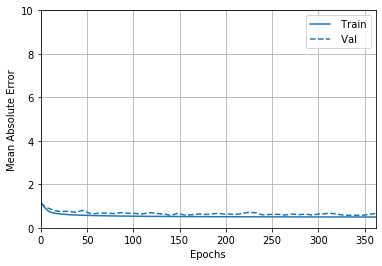

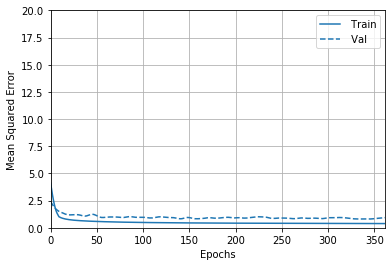

In [23]:
model.show_history()

## Model Validation

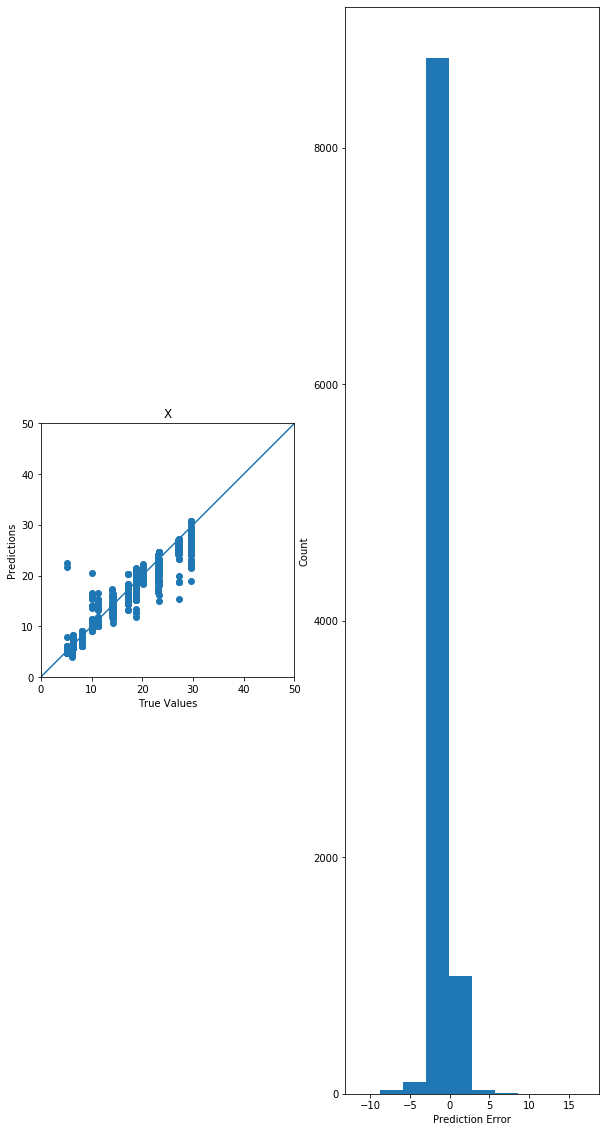

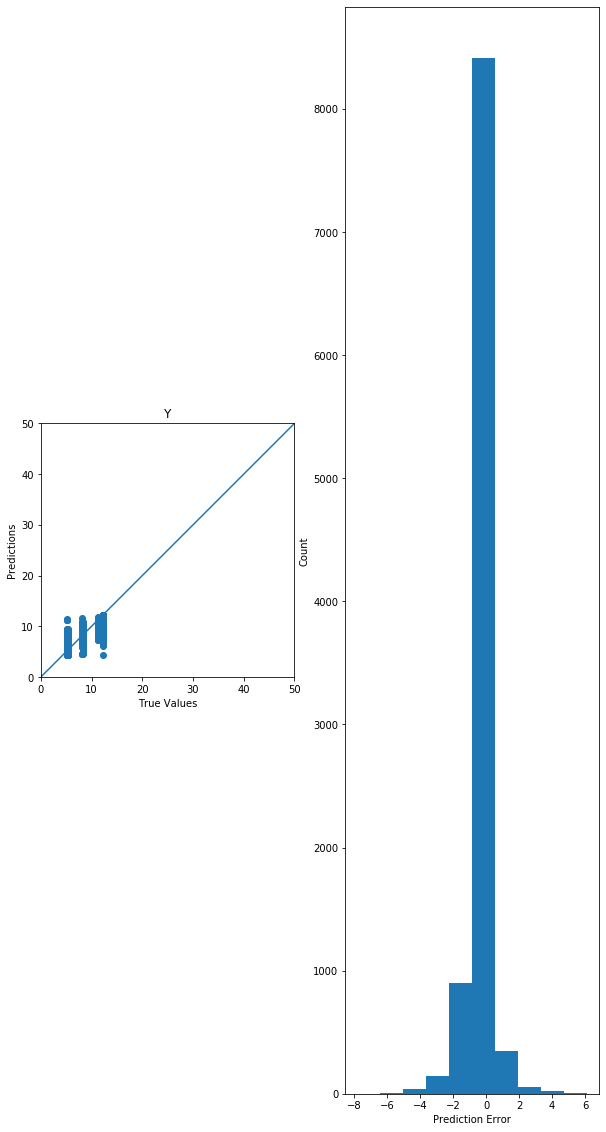

In [24]:
model.model_validation(X_validation, y_validation)

## Model Testing

In [25]:
model.model_testing(X_test, y_test)

9933/1 - 0s - loss: 5.2381 - mae: 0.7849 - mse: 1.2626
Test loss: 8.618501620303224
Mean absolute error: 0.7849167
Mean squared error: 1.2626472


In [26]:
model.save('../Models/MLP_Regression_Rolling_FFill_MinMax.h5')

## Plotting Learning Curves

In [ ]:
train_loss = []
val_loss = []

for f in range(1, 11, 1):
    frac = f / 10.0
    sample = data.sample(frac=frac, random_state=12345)
    train, validation, test = train_validation_test_split(sample)

    train.sort_values("time", inplace=True)
    validation.sort_values("time", inplace=True)
    test.sort_values("time", inplace=True)

    train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

    train_imputed = train_rolled.set_index("location").groupby("location").ffill()
    train_imputed.fillna(0, inplace=True)
    train_imputed.reset_index(inplace=True)

    validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
    validation_imputed.fillna(0, inplace=True)
    validation_imputed.reset_index(inplace=True)

    test_imputed = test_rolled.set_index("location").groupby("location").ffill()
    test_imputed.fillna(0, inplace=True)
    test_imputed.reset_index(inplace=True)

    train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
    train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

    validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
    validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

    test_imputed["X"] = test_imputed["location"].apply(lambda x: pin[x]["X"])
    test_imputed["Y"] = test_imputed["location"].apply(lambda x: pin[x]["Y"])

    X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
    X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
    X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

    model = MLPRegressor()

    history = model.fit(X_train, y_train, X_validation, y_validation)
    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1152      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________
Train on 2979 samples, validate on 993 samples
Epoch 1/1000
2979/2979 [==============================] - 1s 179us/sample - loss: 90.5602 - mae: 6.9191 - mse: 87.6133 - val_loss: 42.0765 - val_mae: 4.5833 - val_mse: 36.5207
Epoch 2/1000
2979/2979 [==============================] - 0s 37us/sample - loss: 24.1148 - mae: 3.1051 - mse: 17.2569 - val_loss: 23.4690 - val_mae: 3.0417 - v

2979/2979 [==============================] - 0s 34us/sample - loss: 9.6298 - mae: 0.9236 - mse: 1.8591 - val_loss: 16.8114 - val_mae: 2.1044 - val_mse: 7.9106
Epoch 44/1000
2979/2979 [==============================] - 0s 36us/sample - loss: 9.6287 - mae: 0.9116 - mse: 1.8302 - val_loss: 16.2133 - val_mae: 1.9694 - val_mse: 7.4909
Epoch 45/1000
2979/2979 [==============================] - 0s 36us/sample - loss: 9.6237 - mae: 0.9049 - mse: 1.8211 - val_loss: 15.7744 - val_mae: 2.0765 - val_mse: 7.8831
Epoch 46/1000
2979/2979 [==============================] - 0s 36us/sample - loss: 9.5931 - mae: 0.9048 - mse: 1.8108 - val_loss: 15.8448 - val_mae: 1.9521 - val_mse: 7.4403
Epoch 47/1000
2979/2979 [==============================] - 0s 36us/sample - loss: 9.5885 - mae: 0.8995 - mse: 1.7953 - val_loss: 15.8193 - val_mae: 2.0113 - val_mse: 7.4840
Epoch 48/1000
2979/2979 [==============================] - 0s 35us/sample - loss: 9.5563 - mae: 0.8851 - mse: 1.7615 - val_loss: 15.6527 - val_mae: 2

Epoch 7/1000
5959/5959 [==============================] - 0s 35us/sample - loss: 10.1111 - mae: 1.1757 - mse: 2.4815 - val_loss: 13.7976 - val_mae: 1.7185 - val_mse: 5.7642
Epoch 8/1000
5959/5959 [==============================] - 0s 49us/sample - loss: 10.0231 - mae: 1.1509 - mse: 2.3911 - val_loss: 13.7702 - val_mae: 1.9559 - val_mse: 6.6961
Epoch 9/1000
5959/5959 [==============================] - 0s 52us/sample - loss: 9.9393 - mae: 1.1299 - mse: 2.3064 - val_loss: 13.5916 - val_mae: 1.6984 - val_mse: 5.6291
Epoch 10/1000
5959/5959 [==============================] - 0s 51us/sample - loss: 9.8306 - mae: 1.0906 - mse: 2.1831 - val_loss: 13.5166 - val_mae: 1.6309 - val_mse: 5.2348
Epoch 11/1000
5959/5959 [==============================] - 0s 37us/sample - loss: 9.7460 - mae: 1.0610 - mse: 2.0859 - val_loss: 13.4174 - val_mae: 1.6466 - val_mse: 5.1656
Epoch 12/1000
5959/5959 [==============================] - 0s 49us/sample - loss: 9.6578 - mae: 1.0354 - mse: 1.9958 - val_loss: 12.9625

5959/5959 [==============================] - 0s 40us/sample - loss: 8.7123 - mae: 0.7241 - mse: 1.0214 - val_loss: 11.7972 - val_mae: 1.4056 - val_mse: 4.2222
Epoch 55/1000
5959/5959 [==============================] - 0s 41us/sample - loss: 8.7164 - mae: 0.7275 - mse: 1.0281 - val_loss: 11.8120 - val_mae: 1.4374 - val_mse: 4.2997
Epoch 56/1000
5959/5959 [==============================] - 0s 56us/sample - loss: 8.7019 - mae: 0.7219 - mse: 1.0185 - val_loss: 11.8858 - val_mae: 1.3913 - val_mse: 4.1180
Epoch 57/1000
5959/5959 [==============================] - 0s 33us/sample - loss: 8.6961 - mae: 0.7216 - mse: 1.0092 - val_loss: 11.7077 - val_mae: 1.4489 - val_mse: 4.2346
Epoch 58/1000
5959/5959 [==============================] - 0s 45us/sample - loss: 8.6901 - mae: 0.7207 - mse: 1.0073 - val_loss: 12.1521 - val_mae: 1.2644 - val_mse: 3.7755
Epoch 59/1000
5959/5959 [==============================] - 0s 61us/sample - loss: 8.6837 - mae: 0.7170 - mse: 0.9985 - val_loss: 12.2171 - val_mae: 1

In [ ]:
x = np.arange(10)
plt.plot(x, train_loss, label='Training loss')
plt.plot(x, val_loss, label='Validation loss')
plt.legend()
plt.xlabel("Dataset size")
plt.ylabel("Loss")
plt.show()